In [1]:
import json
import os
import numpy
import pandas
import copy
import conntility, connalysis

from scipy.spatial import KDTree
from pnagm import util, nngraph, instance, test

from matplotlib import pyplot as plt



In [2]:
config_fn = "../configs/pnagm_L23E_microns_yscale_experimental.json"

with open(config_fn, "r") as fid:
    cfg = json.load(fid)

if "fn" in cfg["make_points"]:
    microns_fn = cfg["make_points"]["fn"]
    print("""
A reference connectome is expected at path {0},
          please place it there or update the path in the configuration file!
""".format(microns_fn))
    
    # For internal use only :)
    microns_connectome_prefix = "/Users/mwr/Documents/artefacts/connectomes"
    cfg["make_points"]["fn"] = os.path.join(microns_connectome_prefix, cfg["make_points"]["fn"])

pts, microns = util.points_from_microns(cfg["make_points"])
reference = microns.matrix > 0


A reference connectome is expected at path microns_mm3_connectome_v1181.h5,
          please place it there or update the path in the configuration file!

11676


In [3]:
DD = test.DDtest(microns)

/Users/mwr/Documents/repositories/local_connectivity_model/src/pnagm/test.py:41: RuntimeWarning: invalid value encountered in divide
  return H / self.h_all
/Users/mwr/Documents/repositories/local_connectivity_model/src/pnagm/test.py:51: RuntimeWarning: invalid value encountered in divide
  return H / self.h_2d_all[ij]


In [4]:
mdl_params = connalysis.modelling.conn_prob_2nd_order_model(DD.m.matrix.tocsr(), DD.m.vertices, bin_size_um=25.0)
a = mdl_params["exp_model_scale"].iloc[0] * 48 / 65
b = mdl_params["exp_model_exponent"].iloc[0]
ctrl_instance = connalysis.randomization.run_DD2(len(DD.m), a, b, DD.m.vertices[["x", "y", "z"]].values)


[2025-04-25 10:32:51,990] INFO: Running order-2 model building {'bin_size_um': 25.0, 'model_dir': None, 'data_dir': None, 'plot_dir': None, 'do_plot': False, 'part_idx': None, 'sample_seed': None}...
[2025-04-25 10:32:52,361] INFO: Extracting 1-dimensional (33) connection probabilities...


[2025-04-25 10:33:05,975] INFO: MODEL FIT: f(x) = 0.083187 * exp(-0.014669 * x)


In [5]:
mdl_instance, M = util.create_neighbor_spread_graph(pts, cfg, reference=microns)

Used custom weights!


/Users/mwr/Documents/repositories/local_connectivity_model/src/pnagm/instance.py:16: RuntimeWarning: invalid value encountered in divide
  p = p_mat.data[a:b] / p_mat.data[a:b].sum()


indegree_model     43.682511
indegree_ref       35.454950
outdegree_model    43.682511
outdegree_ref      35.454950
dtype: float64
indegree_model     37.587273
indegree_ref       35.454950
outdegree_model    37.587273
outdegree_ref      35.454950
dtype: float64


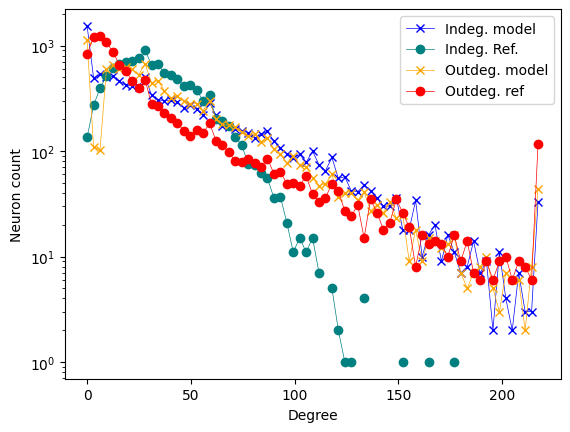

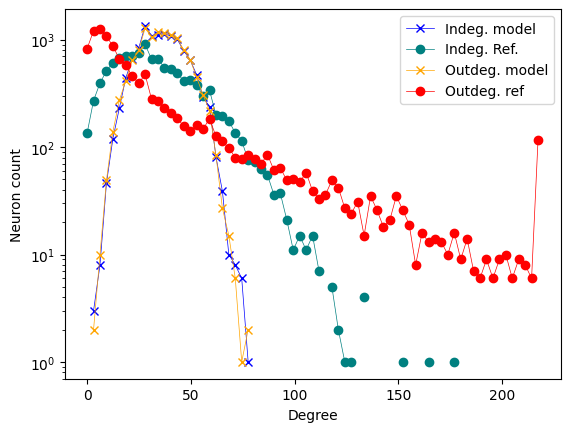

In [6]:
DD.plot_degree_distribution(mdl_instance)
DD.plot_degree_distribution(ctrl_instance)

/Users/mwr/Documents/repositories/local_connectivity_model/src/pnagm/test.py:51: RuntimeWarning: invalid value encountered in divide
  return H / self.h_2d_all[ij]
/var/folders/py/wqmt8l2s5zb8fhrxbd_b258w0000gn/T/ipykernel_5463/2337469955.py:17: RuntimeWarning: divide by zero encountered in log10
  ax.imshow(numpy.log10(DD.p_2d_ref[(1, 2)]), clim=(-5, -1.5),
/var/folders/py/wqmt8l2s5zb8fhrxbd_b258w0000gn/T/ipykernel_5463/2337469955.py:22: RuntimeWarning: divide by zero encountered in log10
  ax.imshow(numpy.log10(DD.twod_for_matrix(mdl_instance, (1, 2))), clim=(-5, -1.5),


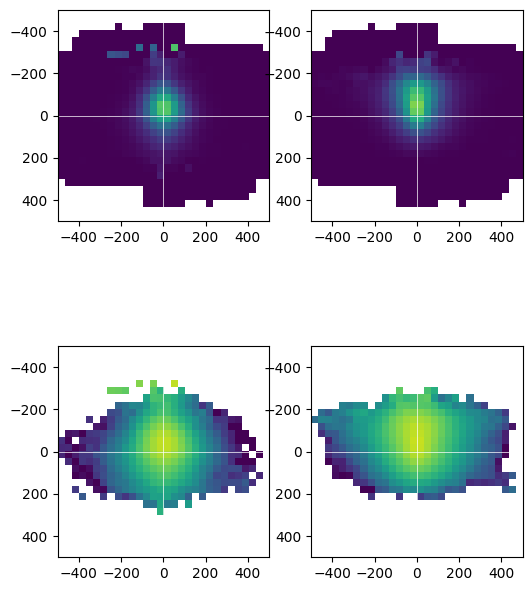

In [7]:
from matplotlib import pyplot as plt
from pnagm.test import dbins2d

fig = plt.figure(figsize=(6, 8))
ax = fig.add_subplot(2, 2, 1)
ax.imshow((DD.p_2d_ref[(1, 2)]), clim=(0, 0.02),
           extent=[dbins2d[0], dbins2d[-1], dbins2d[-1], dbins2d[0]])
ax.set_xlim(ax.get_xlim()); ax.set_ylim(ax.get_ylim())
ax.plot(ax.get_xlim(), [0, 0], color="white", linewidth=0.5)
ax.plot([0, 0], ax.get_xlim(), color="white", linewidth=0.5)
ax = fig.add_subplot(2, 2, 2)
ax.imshow((DD.twod_for_matrix(mdl_instance, (1, 2))), clim=(0, 0.02),
           extent=[dbins2d[0], dbins2d[-1], dbins2d[-1], dbins2d[0]])
ax.plot(ax.get_xlim(), [0, 0], color="white", linewidth=0.5)
ax.plot([0, 0], ax.get_xlim(), color="white", linewidth=0.5)
ax = fig.add_subplot(2, 2, 3)
ax.imshow(numpy.log10(DD.p_2d_ref[(1, 2)]), clim=(-5, -1.5),
           extent=[dbins2d[0], dbins2d[-1], dbins2d[-1], dbins2d[0]])
ax.plot(ax.get_xlim(), [0, 0], color="white", linewidth=0.5)
ax.plot([0, 0], ax.get_xlim(), color="white", linewidth=0.5)
ax = fig.add_subplot(2, 2, 4)
ax.imshow(numpy.log10(DD.twod_for_matrix(mdl_instance, (1, 2))), clim=(-5, -1.5),
           extent=[dbins2d[0], dbins2d[-1], dbins2d[-1], dbins2d[0]])
ax.plot(ax.get_xlim(), [0, 0], color="white", linewidth=0.5)
ax.plot([0, 0], ax.get_xlim(), color="white", linewidth=0.5)

/Users/mwr/Documents/repositories/local_connectivity_model/src/pnagm/test.py:41: RuntimeWarning: invalid value encountered in divide
  return H / self.h_all


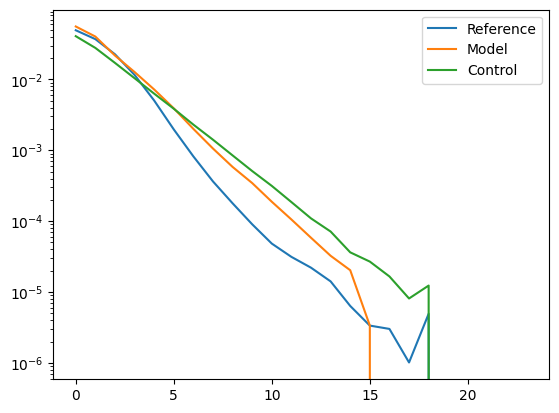

In [8]:
from matplotlib import pyplot as plt


plt.plot(DD.p_ref, label="Reference")
plt.plot(DD.for_matrix(mdl_instance), label="Model")
plt.plot(DD.for_matrix(ctrl_instance), label="Control")
plt.gca().set_yscale("log")
plt.legend()

/Users/mwr/Documents/repositories/local_connectivity_model/src/pnagm/test.py:107: RuntimeWarning: invalid value encountered in divide
  return H_x_con / H_x_all  # Probability that a neuron with connected NN is connected itself (per dist bin)


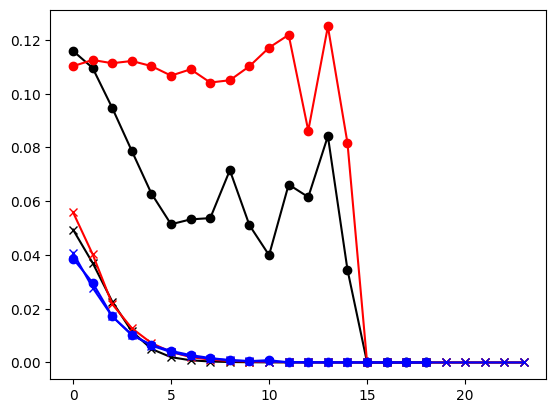

In [9]:
plt.plot(DD.p_ref, color="black", marker='x')
plt.plot(DD.dist_and_nn_analysis(DD.m.matrix), color="black", marker='o')

plt.plot(DD.for_matrix(mdl_instance), color="red", marker='x')
plt.plot(DD.dist_and_nn_analysis(mdl_instance), color="red", marker='o')

plt.plot(DD.for_matrix(ctrl_instance), color="blue", marker='x')
plt.plot(DD.dist_and_nn_analysis(ctrl_instance), color="blue", marker='o')


[2025-04-25 10:33:30,954] WARNING: No seed among keyword arguments
[2025-04-25 10:33:34,143] WARNING: No seed among keyword arguments


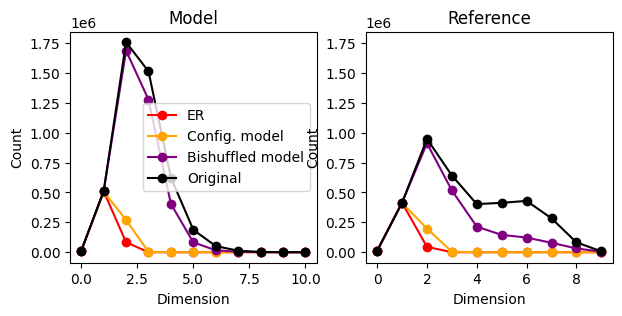

In [10]:
DD.plot_simplex_counts(mdl_instance)
# DD.plot_simplex_counts(ctrl_instance)

In [311]:
display(connalysis.network.classic.common_neighbor_connectivity_bias(reference))

display(connalysis.network.classic.common_neighbor_connectivity_bias(mdl_instance))

display(connalysis.network.classic.common_neighbor_connectivity_bias(ctrl_instance))

(0.0, 15.664659664200192, 0.0)

(0.0, 12.373517588416169, 0.0)

(0.0, 1.43481095834451, 0.0)

(0.2169808586087948, 0.3353384166246762)

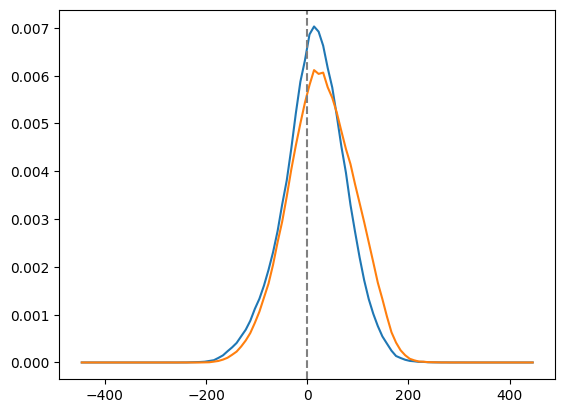

In [11]:
import conntility

dy = numpy.diff(DD.m.edge_associated_vertex_properties("y"), axis=1) # col - row; post - pre
tmp = conntility.ConnectivityMatrix(mdl_instance, vertex_properties=DD.m._vertex_properties)
dy_mdl = numpy.diff(tmp.edge_associated_vertex_properties("y"), axis=1) # col - row; post - pre

dybins = numpy.linspace(-450, 450, 101)
H = numpy.histogram(dy, bins=dybins, density=True)[0]
H_mdl = numpy.histogram(dy_mdl, bins=dybins, density=True)[0]

ax = plt.figure().gca()
ax.plot(0.5 * (dybins[:-1] + dybins[1:]), H)
ax.plot(0.5 * (dybins[:-1] + dybins[1:]), H_mdl)
ax.set_ylim(ax.get_ylim())
ax.plot([0, 0], ax.get_ylim(), color="grey", ls="--")


numpy.sign(dy).mean(), numpy.sign(dy_mdl).mean()

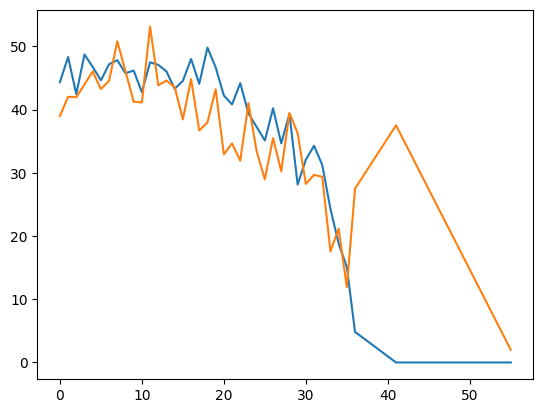

In [12]:
ybins = numpy.linspace(450, 1000, 101)
ybin_ids = numpy.digitize(DD.m.vertices["y"], bins=ybins)

degs_ref = pandas.DataFrame({"deg": numpy.array(DD.m.matrix.sum(axis=1))[:, 0],
                             "bin": ybin_ids})

degs_mdl = pandas.DataFrame({"deg": numpy.array(mdl_instance.sum(axis=1))[:, 0],
                             "bin": ybin_ids})
plt.plot(degs_mdl.groupby("bin")["deg"].mean())
plt.plot(degs_ref.groupby("bin")["deg"].mean())

[Text(0, 0, 'L2a'),
 Text(0, 1, 'L2b'),
 Text(0, 2, 'L2c'),
 Text(0, 3, 'L3a'),
 Text(0, 4, 'L3b')]

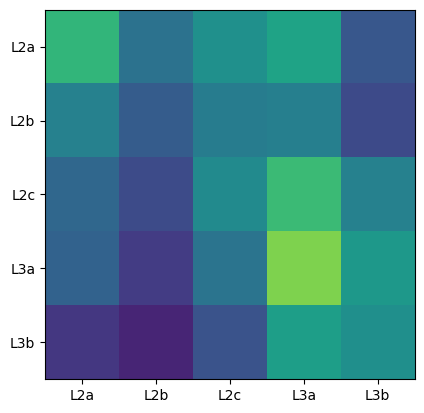

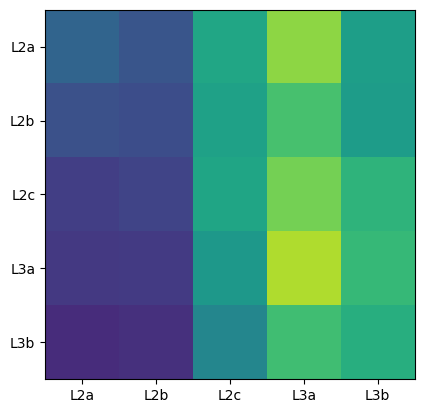

In [13]:
col = "cell_type"
clim = [0, 0.008]

c = DD.m.vertices[col].value_counts().sort_index()
nrml = c.values.reshape((-1, 1)) * c.values.reshape((1, -1))

plt.figure().gca().imshow(DD.m.condense("cell_type").array / nrml, clim=clim)
plt.gca().set_xticks(range(len(c)));plt.gca().set_xticklabels(c.index.values)
plt.gca().set_yticks(range(len(c)));plt.gca().set_yticklabels(c.index.values)

plt.figure().gca().imshow(tmp.condense("cell_type").array / nrml, clim=clim)
plt.gca().set_xticks(range(len(c)));plt.gca().set_xticklabels(c.index.values)
plt.gca().set_yticks(range(len(c)));plt.gca().set_yticklabels(c.index.values)